# WEB SCRAPING USING PYTHON!

- The Dataset used for Building the Recommendation Engine is scraped from the Web with the help of Python!

### Beautiful Soup Library is used to accomplish the task

- It is Easy to use and simple to understand!

### Import the Necessary Libraries and Include the URL of the Website from the information is scraped.

##### IMDb Website is used to scrape the information required to build our Data Set!
- Information of about 50 films from various Genres is scraped from the Website.

In [1]:
#IMPORT THE NECESSARY LIBRARIES AND DECLARE THE IMDb WEBSITE URL: 
import requests
url = 'https://www.imdb.com/feature/genre/?ref_=nv_ch_gr'
page_contents = requests.get(url)
page = page_contents.text

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from bs4 import BeautifulSoup
doc = BeautifulSoup(page,'html.parser')

#### Declare Empty lists to store the information that is scraped:
- We also store the URLs of the Individual Links of the Genres Available

In [2]:
#INITIALIZE EMPTY LISTS FOR THE COLUMNS WE NEED TO APPEND TO OUR DATAFRAME:
division_urls = []
genrelist=[]
taglineinfo =[]
DirectorsList = []
movie_cast = []
top_review = []
movie_titles = []
meta_score = []
base_url = 'https://www.imdb.com'
span_tags_list =[]
movie_rating = []
release_year =[]
div_tags = doc.find_all('div',{'class':'image'})
for tags in div_tags:
    division_urls.append(tags.find('a')['href'])

#### Define functions to Scrape Information from the Website!

In [3]:
#DEFINE FUNCTION TO GET THE MOVIE LINKS AND TITLES:

def GET_MOVIE_LINKS_AND_TITLES(parsed_string):
    h3_tags = parsed_string.find_all('h3',{'class':'lister-item-header'})
    for tags in h3_tags:
        movie_titles.append(tags.find('a').text)
        movie_links.append(base_url + tags.find('a')['href'])

#DEFINE FUNCTION TO GET THE MOVIE RATING:
        
def GET_MOVIE_RATING(parsed_string):
    span_tags = parsed_string.find('span',{'class':'AggregateRatingButton__RatingScore-sc-1ll29m0-1 iTLWoV'})
    if(span_tags):
        movie_rating.append(float(span_tags.text.strip()))
    else:
        movie_rating.append(np.nan)
        
#DEFINE FUNCTION TO GET THE MOVIE TAGLINE AND GENRE:
        
def GET_TAGLINE_AND_GENRE(parsed_string):
    ul_tags_info = parsed_string.find('ul',{'class':'ipc-metadata-list ipc-metadata-list--dividers-all Storyline__StorylineMetaDataList-sc-1b58ttw-1 esngIX ipc-metadata-list--base'})
    taglineinf = ul_tags_info.find('span',{'class':'ipc-metadata-list-item__list-content-item'})
    if(taglineinf):
        taglineinfo.append(taglineinf.text)
    else:
        taglineinfo.append(np.nan)
    genreinfo = ul_tags_info.find_all('a',{'class':'ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'})
    genre = ''
    for i in genreinfo:
        genre = genre + ',' + i.text
    genrelist.append(genre)
    
#DEFINE FUNCTION TO GET THE MOVIE RELEASE YEAR:
    
def GET_RELEASE_YEAR(parsed_string):
    span_tags_release_yr = parsed_string.find('span',{'class':'TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex'})
    if(span_tags_release_yr):
        release_year.append(span_tags_release_yr.text)
    else:
        release_year.append(np.nan)
        
#DEFINE FUNCTION TO GET THE MOVIE DIRECTOR:
        
def GET_DIRECTOR(parsed_string):
    a_tags_director = parsed_string.find_all('a',{'class':'ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'})
    if(a_tags_director):
        DirectorsList.append(a_tags_director[0].text)
    else:
        DirectorsList.append(np.nan)
    
#DEFINE FUNCTION TO GET THE MOVIE CAST:

def GET_MOVIE_CAST(parsed_string):
    li_tags_cast = parsed_string.find_all('a',{'class':'ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'})
    cast =''
    li_tags_cast = li_tags_cast[2:5]
    for i in li_tags_cast:
        cast = cast + ',' +i.text.strip()
    movie_cast.append(cast.strip(','))

#DEFINE FUNCTION TO GET THE MOVIE TOP REVIEW:
    
def GET_TOP_REVIEW(parsed_string):
    span_tags_review = parsed_string.find('span',{'class':'UserReviewSummary__Summary-kfza1v-1 bA-dHai'})
    if(span_tags_review):
        top_review.append(span_tags_review.text)
    else:
        top_review.append('np.nan')

#DEFINE FUNCTION TO GET THE MOVIE META SCORE:        

def GET_META_SCORE(parsed_string):
    span_class_meta_score = parsed_string.find('span',{'class':'score-meta'})
    if(span_class_meta_score):
        meta_score.append(int(span_class_meta_score.text))
    else:
        meta_score.append(np.nan)

#### Traverse through the Links and Scrape the information:

In [4]:
#GET THE DETAILS OF ALL THE MOVIES WITHIN EACH GENRE:
for url in division_urls:
    sub_url = url
    sub_url_contents = requests.get(sub_url)
    sub_url_text = sub_url_contents.text
    sub_url_doc = BeautifulSoup(sub_url_text,'html.parser')
    #THE MOVIE LINKS IS INITIALISED TO 0 TO HAVE A LIST OF ALL THE LINKS FOR A PARTICULAR GENRE:
    movie_links = []
    
    #GET THE MOVIE LINKS FOR A PARTICULAR GENRE FROM THE WEB PAGE
    GET_MOVIE_LINKS_AND_TITLES(sub_url_doc)
        
    #GET THE DETAILS OF ALL THE MOVIES WITHIN THAT GENRE OF THE WEB PAGE:
    #THERE ARE 15 GENRES AND THERE ARE 50 MOVIES WITHIN EACH GENRE:
    
    for links in movie_links:
        sub_movie_link_contents = requests.get(links)
        sub_movie_link_page = sub_movie_link_contents.text
        sub_movie_link_doc = BeautifulSoup(sub_movie_link_page,'html.parser')
        
        #GET THE MOVIE RATING:
        GET_MOVIE_RATING(sub_movie_link_doc)
        
        #GET THE MOVIE TAGLINE AND GENRE:
        GET_TAGLINE_AND_GENRE(sub_movie_link_doc)

        #GET THE MOVIE RELEASE YEAR:
        GET_RELEASE_YEAR(sub_movie_link_doc)
        
        #GET THE MOVIE DIRECTOR:
        GET_DIRECTOR(sub_movie_link_doc)
        
        #GET THE MOVIE CAST:
        GET_MOVIE_CAST(sub_movie_link_doc)
        
        #GET THE MOVIE TOP REVIEW:
        GET_TOP_REVIEW(sub_movie_link_doc)
        
        #GET THE MOVIE META SCORE:
        GET_META_SCORE(sub_movie_link_doc)

#### Create a Dictionary out of the Selected Columns:

In [5]:
#CREATE A DICTIONARY OUT OF THE SCRAPED INFORMATION:

dict = {'Title': movie_titles,
        'Movie Rating' : movie_rating,
        'Director': DirectorsList,
        'Release Year': release_year,
        'Genres' : genrelist,
        'Cast': movie_cast,
        'TagLine': taglineinfo,
        'Top Review':top_review,
        'Meta Score':meta_score
       }

#### Generate a DataFrame out of the Dictionary:

In [6]:
#CONVERT THE DICTIONARY TO A DATAFRAME:

data = pd.DataFrame(dict).sample(frac=1).reset_index(drop=True)

#GET THE DATATYPE AND NON NULL VALUES OF THE RAW DATA:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         750 non-null    object 
 1   Movie Rating  699 non-null    float64
 2   Director      750 non-null    object 
 3   Release Year  750 non-null    object 
 4   Genres        750 non-null    object 
 5   Cast          750 non-null    object 
 6   TagLine       713 non-null    object 
 7   Top Review    750 non-null    object 
 8   Meta Score    258 non-null    float64
dtypes: float64(2), object(7)
memory usage: 52.9+ KB


## Perform Exploratory Data Analysis of the Raw Data:
- EDA is performed on the data.

#### Measure of Central Tendency on the Dataset is Measured:

In [7]:
#GET THE MEASURE OF CENTRAL TENDENCIES OF THE DATASET:

data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,750,363,Hawkeye,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Movie Rating,699.0,NaN,NaN,NaN,7.461373,1.097403,3.3,6.8,7.6,8.3,9.4
Director,750,328,Greg Berlanti,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Release Year,750,115,2021,220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,750,210,",Crime,Drama,Mystery,Thriller",29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cast,750,362,"Florence Pugh,Jeremy Renner,Hailee Steinfeld",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TagLine,713,292,16,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Top Review,750,351,np.nan,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Meta Score,258.0,NaN,NaN,NaN,61.29845,14.16111,30.0,49.0,61.5,72.0,94.0


#### Check for NULL values on the dataset:

In [8]:
#CHECK IF THE DATASET HAS ANY NULL VALUES:

data.isnull().sum()

Title             0
Movie Rating     51
Director          0
Release Year      0
Genres            0
Cast              0
TagLine          37
Top Review        0
Meta Score      492
dtype: int64

### Replacing the NULL Values in the DataSet:

In [9]:
#FILL THE MISSING VALUES IN MOVIE RATING WITH THE MEAN OF THE ENTIRE PANDAS SERIES:
data['Movie Rating'].fillna(value = round(data['Movie Rating'].mean(),1),inplace = True)

#FILL THE NULL VALUES IN THE META SCORE COLUMN WITH '0':
data['Meta Score'].fillna(0,inplace =  True)

#FILL THE NULL VALUES IN TAGLINE DATA SERIES WITH INFORMATION UNAVAILABLE:
data['TagLine'].fillna('Information Unavailable',inplace = True)

#GET THE DATATYPE AND NON NULL VALUES OF THE PROCESSED DATA:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         750 non-null    object 
 1   Movie Rating  750 non-null    float64
 2   Director      750 non-null    object 
 3   Release Year  750 non-null    object 
 4   Genres        750 non-null    object 
 5   Cast          750 non-null    object 
 6   TagLine       750 non-null    object 
 7   Top Review    750 non-null    object 
 8   Meta Score    750 non-null    float64
dtypes: float64(2), object(7)
memory usage: 52.9+ KB


#### Check for NULL values again and drop if any:

In [10]:
#IF ANY NULL VALUES ARE FOUND IN ANY OTHER COLUMNS, DROP THEM:
data.dropna(inplace = True)

In [11]:
#CHECK IF ANY NULL VALUES ARE PRESENT IN THE DATAFRAME:
data.isnull().sum()

Title           0
Movie Rating    0
Director        0
Release Year    0
Genres          0
Cast            0
TagLine         0
Top Review      0
Meta Score      0
dtype: int64

#### Convert the Release Year Column into Integer:

In [12]:
#OBSERVING THAT THE RELEASE YEAR COLUMN IS NOT PROPER, WE CONSIDER ONLY THE FIRST YEAR OF RELEASE INFORMATION AVAILABLE:
data['Release Year'] =  data['Release Year'].apply(lambda x: x[:4])

#CONVERT THE STRING DATA SERIES TO A NUMERIC COLUMN:
data['Release Year'] = pd.to_numeric(data['Release Year'])


In [13]:
#CHECK IF THE DATA TYPE OF RELEASE YEAR HAS BEEN CHANGED TO INTEGER TYPE:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         750 non-null    object 
 1   Movie Rating  750 non-null    float64
 2   Director      750 non-null    object 
 3   Release Year  750 non-null    int64  
 4   Genres        750 non-null    object 
 5   Cast          750 non-null    object 
 6   TagLine       750 non-null    object 
 7   Top Review    750 non-null    object 
 8   Meta Score    750 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 58.6+ KB


#### Plot a Histogram of the Release Year:

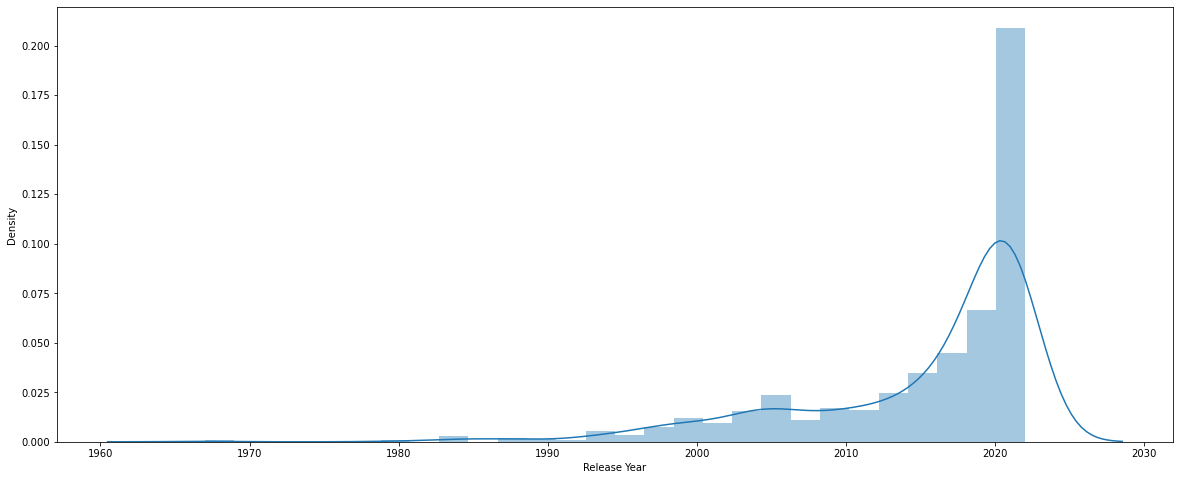

In [14]:
#SET THE FIGURE SIZE OF THE PLOTS
plt.rcParams['figure.figsize'] = [20, 8]

#GENERATE A HISTOGRAM PLOT FOT THE RELEASE YEAR COLUMN:
sns.distplot(x=data['Release Year'])
plt.xlabel('Release Year')
plt.ylabel('Density')
plt.show()

### *Insights*
- We Could see that most of the films were released only in the year 2020 and 2021.

#### Generate the Correlation Matrix and Plot the HeatMap:

<AxesSubplot:>

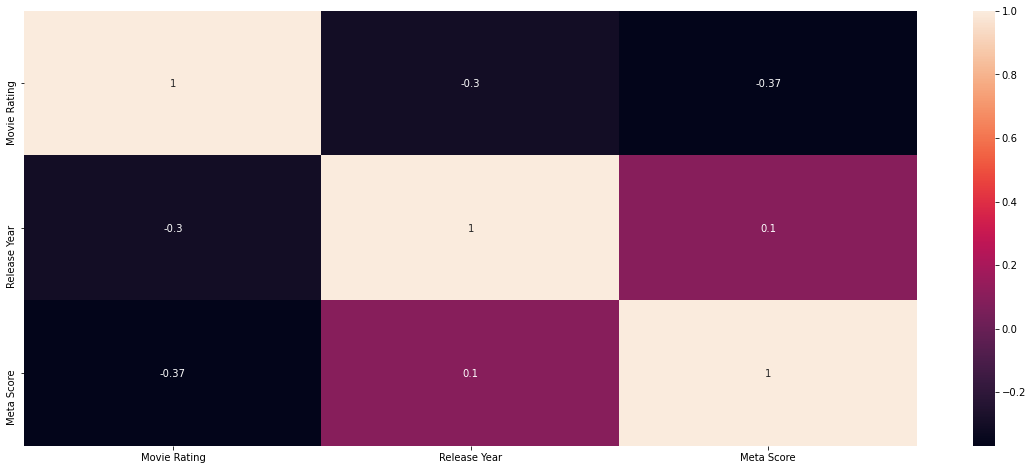

In [15]:
#GENERATE A MATRIX WITH THE CORRELATION INFORMATION:
tc = data.corr()

#PLOT A HEATMAP WITH THE CORRELATION MATRIX:
sns.heatmap(tc,annot = True)

### *Insights*
- There is a Positive Correlation between the 'Release Year' and the 'Meta Score' Column.
- There is a Negative Correation between the 'Release Year' and 'Movie Rating' Column.
- There is a Negative Correation between the 'Meta Score' and 'Movie Rating' Column.

### Interactive Data Visualisation:
- Use plotly and Cufflinks for Interactive Data Visualisation.

In [16]:
#IMPORT THE PLOTLY AND CUFFLINKS LIBRARIES FOR INTERACTIVE DATA VISUALISATION:
import chart_studio.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

### Barplot:

In [17]:
#GENERATE A BARPLOT BETWEEN THE RELEASE YEAR AND THE META SCORE COLUMN:
data.iplot(kind='bar',x='Release Year',y='Meta Score')

### Spread Plot:

In [20]:
#GENERATE A SPREAD PLOT BETWEEN THE MOVIE RATING AND THE META SCORE COLUMN:
data[['Movie Rating','Meta Score']].iplot(kind='spread')

### Convert the Data Set into CSV Format:

In [21]:
#CONVERT THE PROCESSED DATA TO A CSV FORMAT AND STORE IT IN THE SAME WORKING DIRECTORY:
data.to_csv('movie_recommend.csv')

# Now that our DataSet is ready, It is Time to build our Movie Recommendation Engine in the Subsequent Code!! 